### 타이타닉 데이터셋 시각화

In [1]:
import pandas as pd

In [4]:
train = pd.read_csv("C:/BigData_MachineLearning/dataset/train.csv")
test = pd.read_csv("C:/BigData_MachineLearning/dataset/test.csv")


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 특성공학 : 파생변수 생성
- 부모자식 + 형제배우자 + 1 = 가족

In [7]:
train["Family_size"] = train["SibSp"]+train["Parch"]+1
test["Family_size"] = test["SibSp"]+test["Parch"]+1

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [9]:
import seaborn as sns

<AxesSubplot:xlabel='Family_size', ylabel='count'>

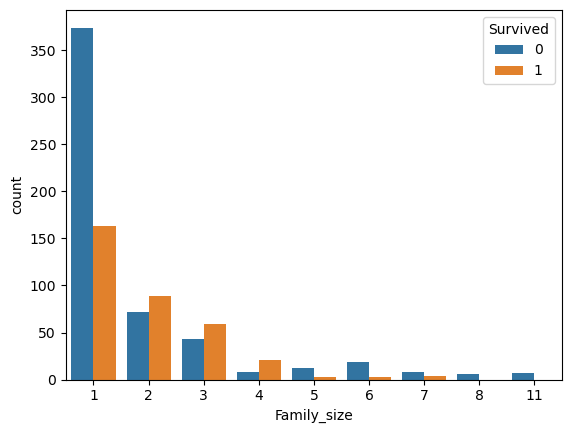

In [13]:
# 가족 숫자별로 생존여부를 알고싶음
sns.countplot(data = train, x="Family_size",hue="Survived")

# 인사이트 도출
# 1명일때는 죽은 비율이 높고, 2~4명일때는 산 비율이 높고, 그 이상은 죽은 비율이 높다.

### 파생변수 생성(Binning)
- binning : 연속 수치 -> 구간값으로 변경
- 자르고자하는 구간 정보가 있어야함
- 데이터가 있어야함
- 잘랐을 때 데이터의 구간 이름이 있어야함

In [14]:
# 구간 설정 (0~1명, 2~4명, 5이상)
bins = [0,1,4,20]
# 구간별 이름 설정
labels = ["Alone","Small","Large"]
# 파생변수 생성
train["Family_group"] = pd.cut(train["Family_size"], bins = bins, labels = labels)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone


In [16]:
# 구간 설정 (0~1명, 2~4명, 5이상)
bins = [0,1,4,20]
# 구간별 이름 설정
labels = ["Alone","Small","Large"]
# 파생변수 생성
test["Family_group"] = pd.cut(test["Family_size"], bins = bins, labels = labels)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_group
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Small
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Alone
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,Small


<AxesSubplot:xlabel='Family_group', ylabel='count'>

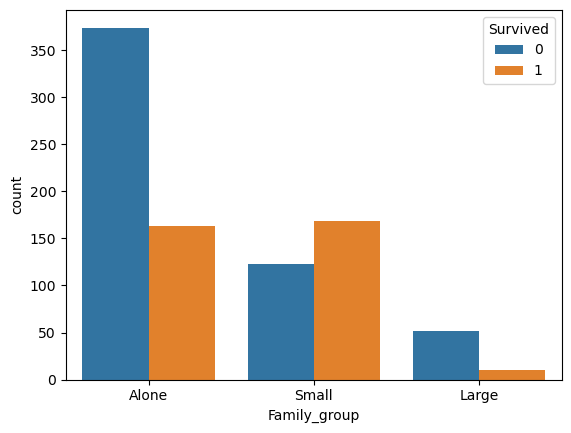

In [18]:
# 가족 범위별 생존 여부 시각화
sns.countplot(train, x = "Family_group", hue= "Survived")

### 성별 생존여부 시각화

<AxesSubplot:xlabel='Sex', ylabel='count'>

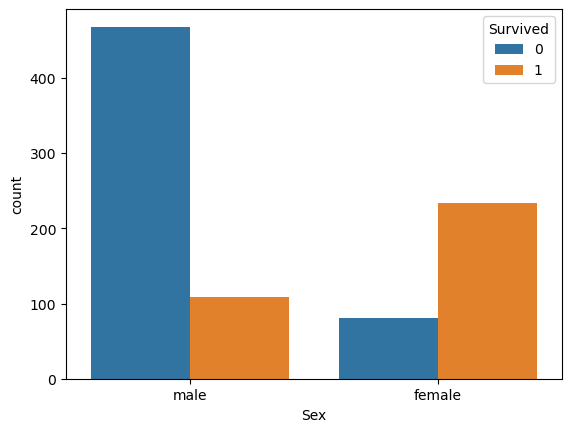

In [19]:
sns.countplot(train, x = "Sex", hue="Survived")

### Embarked (선착장)별 생존여부 시각화

<AxesSubplot:xlabel='Embarked', ylabel='count'>

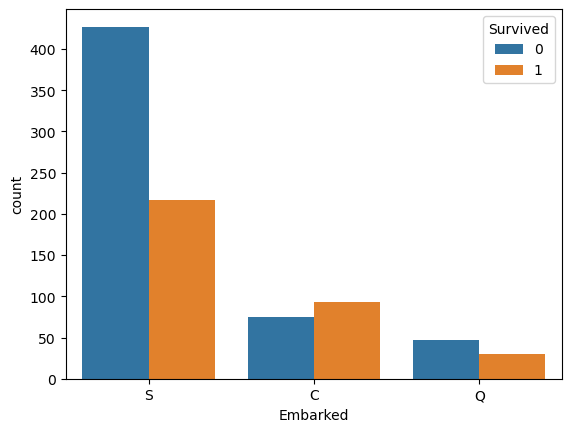

In [21]:
sns.countplot(train,x="Embarked",hue="Survived")

### 수치형(연속형)데이터 시각화
- 수치형 데이터는 구간을 정해서 빈도를 센다
- 주로 히스토그램을 이용해 그림을 그린다
- KDE(커널밀도함수그래프)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

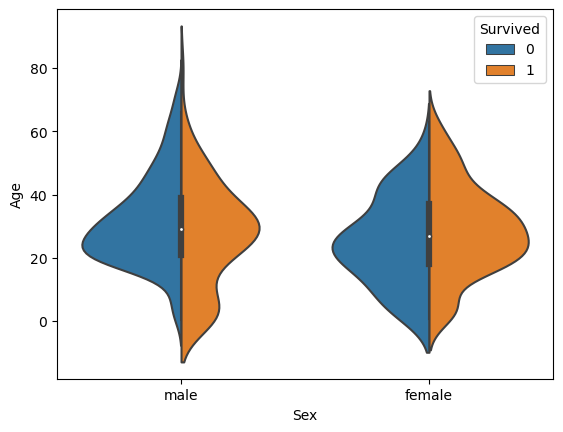

In [23]:
sns.violinplot(train,x="Sex",y="Age",hue="Survived", split=True)